<a href="https://colab.research.google.com/github/ignAtom/eda/blob/main/used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used cars

Use the "Run" button to execute the code.

In [165]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('used-cars')
jovian.set_colab_id('1BGEUh_GRa3oVWWo8xztcghVhC3yN4aXF?authuser=1#scrollTo=nHRH9RnFa8SV')

# Used Cars Exploratory Data Analysis

TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)


* Kaggle
* information about cars
* can be useful for marketing






In [107]:
pip install opendatasets --upgrade --quiet

In [108]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data'
od.download(download_url)

Skipping, found downloaded files in "./craigslist-carstrucks-data" (use force=True to force download)


## Download the data

In [109]:
data_filename = './craigslist-carstrucks-data/vehicles.csv'

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values


In [110]:
import pandas as pd

In [111]:
df = pd.read_csv(data_filename)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [113]:
df.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

df = df.drop('size', axis = 1)

In [114]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

7

In [115]:
missing_percentages = df.isna().sum().sort_values(ascending=False) /len(df)
missing_percentages

county          1.000000
size            0.717675
cylinders       0.416225
condition       0.407852
VIN             0.377254
drive           0.305863
paint_color     0.305011
type            0.217527
manufacturer    0.041337
title_status    0.019308
lat             0.015342
long            0.015342
model           0.012362
odometer        0.010307
fuel            0.007058
transmission    0.005988
year            0.002823
description     0.000164
image_url       0.000159
posting_date    0.000159
url             0.000000
price           0.000000
state           0.000000
region_url      0.000000
region          0.000000
id              0.000000
dtype: float64

In [116]:
missing_percentages = missing_percentages.drop(['size', 'county'], axis=0)

<Axes: >

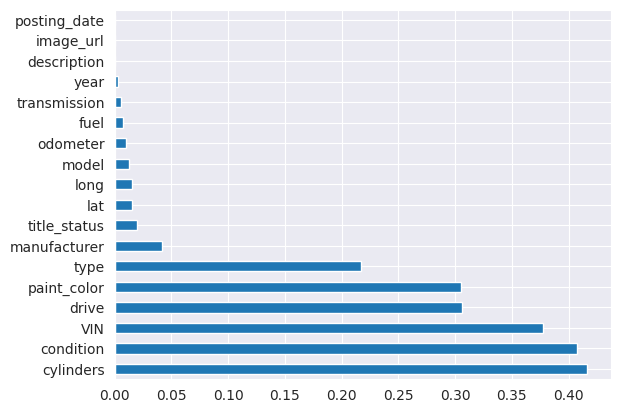

In [117]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use.

## Exploratory Analysis and Visualisation

Columns we'll analyse:

1. Price
2. Year
3. Manucafturer
5. Lat and long


In [118]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [119]:
df.price

0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 426880, dtype: int64

### Manufacturer Analysis
- Manufacturers manufacturing the most number of cars will be found out

In [120]:
df.manufacturer

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
426875      nissan
426876       volvo
426877    cadillac
426878       lexus
426879         bmw
Name: manufacturer, Length: 426880, dtype: object

In [121]:
Maker = df.manufacturer.unique()
Maker

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [122]:
top_manufacturer = df.manufacturer.value_counts()
top_manufacturer

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [123]:
top_manufacturer.sum()

409234

 ### Which companies have the most and least market share?
 - We will be finding out which manufacturers have the most market share using graphs and percentages.

In [124]:
market_share = top_manufacturer/top_manufacturer.sum()*100
market_share.round(decimals=2)

ford               17.35
chevrolet          13.46
toyota              8.36
honda               5.20
nissan              4.66
jeep                4.65
ram                 4.48
gmc                 4.10
bmw                 3.59
dodge               3.35
mercedes-benz       2.89
hyundai             2.53
subaru              2.32
volkswagen          2.28
kia                 2.07
lexus               2.00
audi                1.85
cadillac            1.70
chrysler            1.47
acura               1.46
buick               1.34
mazda               1.33
infiniti            1.17
lincoln             1.03
volvo               0.82
mitsubishi          0.80
mini                0.58
pontiac             0.56
rover               0.52
jaguar              0.48
porsche             0.34
mercury             0.29
saturn              0.27
alfa-romeo          0.22
tesla               0.21
fiat                0.19
harley-davidson     0.04
ferrari             0.02
datsun              0.02
aston-martin        0.01


<Axes: >

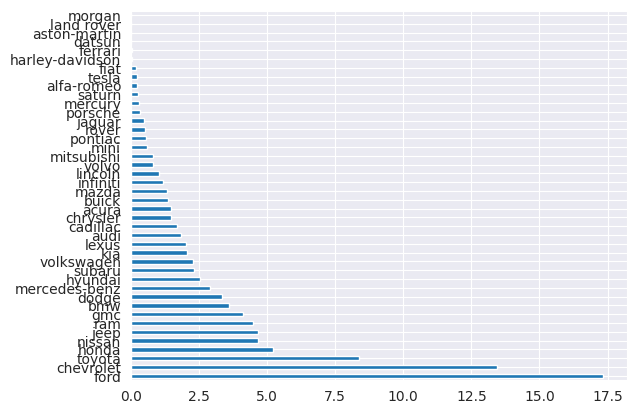

In [125]:
market_share.plot(kind = 'barh')

In [126]:
import seaborn as sns
sns.set_style('darkgrid')

<ipython-input-127-463212673ea6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top_manufacturer)


<Axes: xlabel='manufacturer', ylabel='Density'>

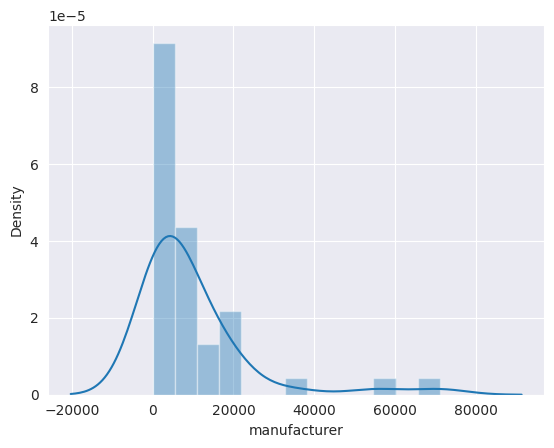

In [127]:
sns.distplot(top_manufacturer)

In [128]:
popular_manufacturer = market_share[market_share >= 10]
average_manufacturer = market_share[(market_share>=1) & (market_share<10)]
unpopular_manufacturer = market_share[market_share < 1]

In [129]:
for i in market_share:
  if i <= 1 and i >= 10:
    i

In [131]:
len(average_manufacturer)

22

In [132]:
popular_manufacturer.sum().round(decimals=2)

30.8

<ipython-input-133-fad8f40b98a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_share)


<Axes: xlabel='manufacturer', ylabel='Density'>

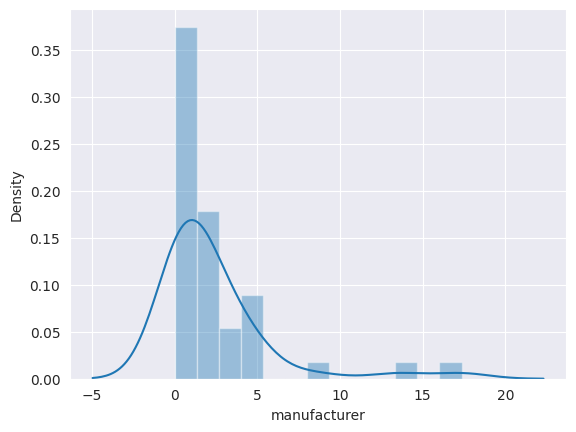

In [133]:
sns.distplot(market_share)

<ipython-input-134-1be8499c50b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_manufacturer)


<Axes: xlabel='manufacturer', ylabel='Density'>

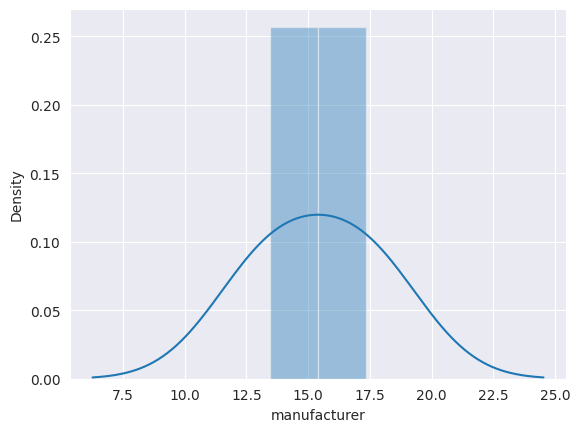

In [134]:
sns.distplot(popular_manufacturer)

<ipython-input-135-cad21714ff66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_manufacturer)


<Axes: xlabel='manufacturer', ylabel='Density'>

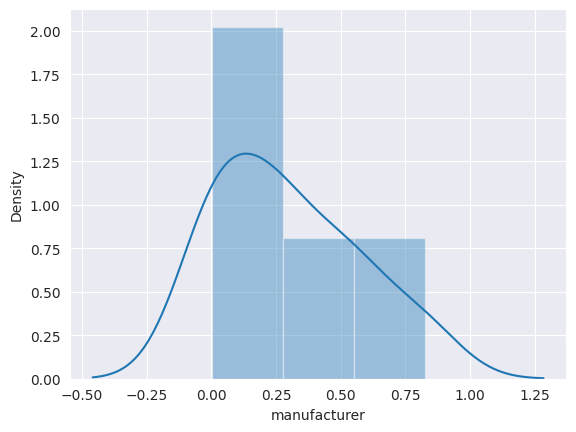

In [135]:
sns.distplot(unpopular_manufacturer)

<ipython-input-136-0936c6d5153f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_manufacturer)


<Axes: xlabel='manufacturer', ylabel='Density'>

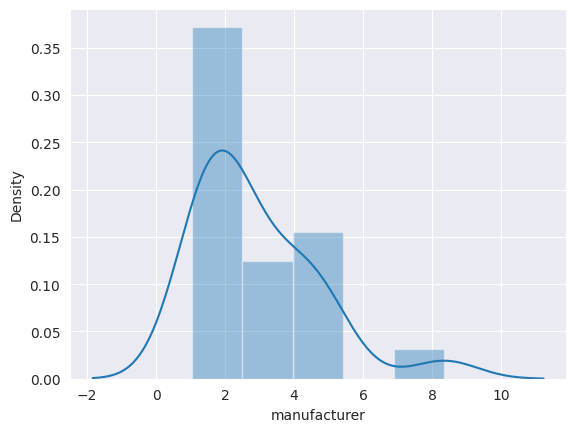

In [136]:
sns.distplot(average_manufacturer)

### Analysis of when the cars are bought by customers
- We will analyse the hours of a day, days of the week, and trends of years to check when most of the purchases are being made.

In [137]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

In [138]:
df.posting_date[20:40]

20                         NaT
21                         NaT
22                         NaT
23                         NaT
24                         NaT
25                         NaT
26                         NaT
27   2021-05-04 17:31:18+00:00
28   2021-05-04 17:31:08+00:00
29   2021-05-04 17:31:25+00:00
30   2021-05-04 15:41:31+00:00
31   2021-05-03 19:02:03+00:00
32   2021-05-03 18:41:25+00:00
33   2021-05-03 17:41:33+00:00
34   2021-05-03 17:12:59+00:00
35   2021-05-03 16:31:14+00:00
36   2021-05-03 12:50:35+00:00
37   2021-05-03 12:38:05+00:00
38   2021-05-02 17:22:10+00:00
39   2021-05-02 15:51:08+00:00
Name: posting_date, dtype: datetime64[ns, UTC]

<ipython-input-139-96e5cfa37b77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.posting_date.dt.hour, bins=24, kde=False)


<Axes: xlabel='posting_date'>

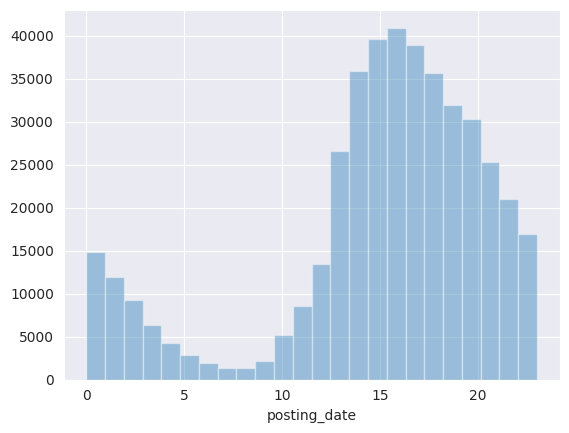

In [139]:
sns.distplot(df.posting_date.dt.hour, bins=24, kde=False)

<ipython-input-140-ff0c05fe6fcd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.posting_date.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='posting_date'>

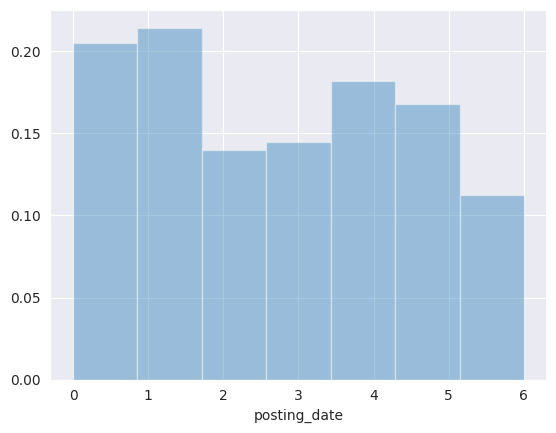

In [140]:
sns.distplot(df.posting_date.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour same on weekends as on weekdays?

<ipython-input-141-f6d3a4fc59e9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sunday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


<Axes: xlabel='posting_date'>

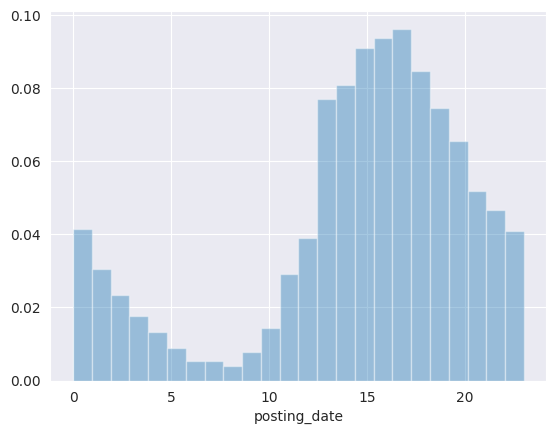

In [141]:
sunday_start_time = df.posting_date[df.posting_date.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

- Sundays have a similar distribution to the rest of the week

<ipython-input-142-a76fc15e37bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.posting_date.dt.month, bins=12, kde=False, norm_hist=True)


<Axes: xlabel='posting_date'>

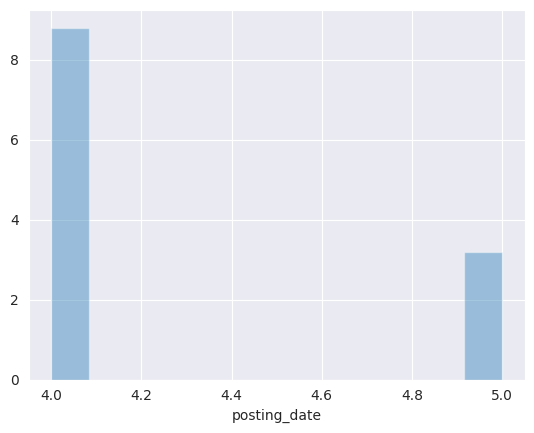

In [142]:
df_2019 = df[df.posting_date.dt.year == 2021]
sns.distplot(df_2019.posting_date.dt.month, bins=12, kde=False, norm_hist=True)

- Most cars are being sold between 2pm to 6 pm (Probably because people want to buy cars in the afternoon, and drive it back safely before nighttime)
- 5am to 9 am has the least amount of cars bought (Too early in the morning)

In [143]:
df.posting_date.dt.year.unique()

array([  nan, 2021.])

- Since the data is only from 2021, it is not possible to see trends of other years

### Which latitude and longitude (area) are buying the most cars?
- We will analyse which region most of the cars are being sold in, and create a heat map for easier analysis.

In [144]:
df.lat

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
426875    33.786500
426876    33.786500
426877    33.779214
426878    33.786500
426879    33.779214
Name: lat, Length: 426880, dtype: float64

In [145]:
df.long

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
426875   -84.445400
426876   -84.445400
426877   -84.411811
426878   -84.445400
426879   -84.411811
Name: long, Length: 426880, dtype: float64

<Axes: xlabel='long', ylabel='lat'>

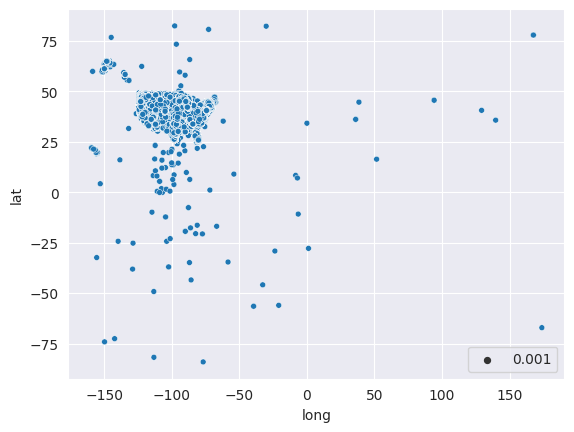

In [146]:
sns.scatterplot(x=df.long, y=df.lat, size = 0.001)

In [147]:
import folium

In [148]:
df.lat

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
426875    33.786500
426876    33.786500
426877    33.779214
426878    33.786500
426879    33.779214
Name: lat, Length: 426880, dtype: float64

In [149]:
lat, lon = df.lat[0], df.long[0]
lat, lon

(nan, nan)

In [150]:
for x in df[['lat', 'long']].sample(100).iteritems():
  print(x[1])

89451     39.105521
130139    21.296235
230148    35.160056
219226    33.779214
7423      61.180231
            ...    
328008    40.500000
143498    40.474352
188841    41.929600
191867    42.199700
218653    31.316064
Name: lat, Length: 100, dtype: float64
89451     -77.566545
130139   -157.859345
230148    -83.422966
219226    -84.411811
7423     -149.869503
             ...    
328008    -78.400000
143498    -88.983012
188841    -71.300900
191867    -71.906900
218653    -89.437114
Name: long, Length: 100, dtype: float64


<ipython-input-150-dd4be6464ad9>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x in df[['lat', 'long']].sample(100).iteritems():


In [151]:
(zip(list(df.lat), list(df.long)))

In [152]:
from folium.plugins import HeatMap

In [154]:
data=df.dropna(subset=['long'])
data=df.dropna(subset=['lat'])



In [161]:
sample_data = data.sample(int(0.000001 * len(data)))
lat_lon_pairs = list(zip(list(data.lat), list(data.long)))

In [162]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

Most of the cars are mainly being purchased in USA

## Ask and Answer Questions

1. Which latitude and longitude are buying the most cars? - ANSWERED
2. Which manufacturers are manufacturing the most amount of cars? - ANSWERED
2. Which companies have the most and least market share? - ANSWERED
3. What time of the day are most cars getting sold in? - ANSWERED
4. Which days of the week are most cars sold in? - ANSWERED
5. Which months of the year are the most cars sold in? - ANSWERED


## Summary and Conclusion

Insights:
1. Two companies (Chevrolet and Ford) occupy 30.8% market share.
2. Most of the cars are being sold in the USA.
3. Weekends are not affecting the numbers of cars being bought by customers.

Future prospects:
1. Further analysis can be done comparing the price to region.
2. Odometer count can be analysed and compared with price and region to figure out which type of cars are driven the most, and where?

